<a href="https://colab.research.google.com/github/ancestor9/24_fall_python-programimming-2/blob/main/1122_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%86%8C%EA%B0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Classification**

In [1]:
# prompt: iris 데이터를 불러줘

import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target_names'] = iris_df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_names  
0       0       setosa  
1       0       setosa  
2       0       setosa  
3       0       setosa  
4       0       setosa  


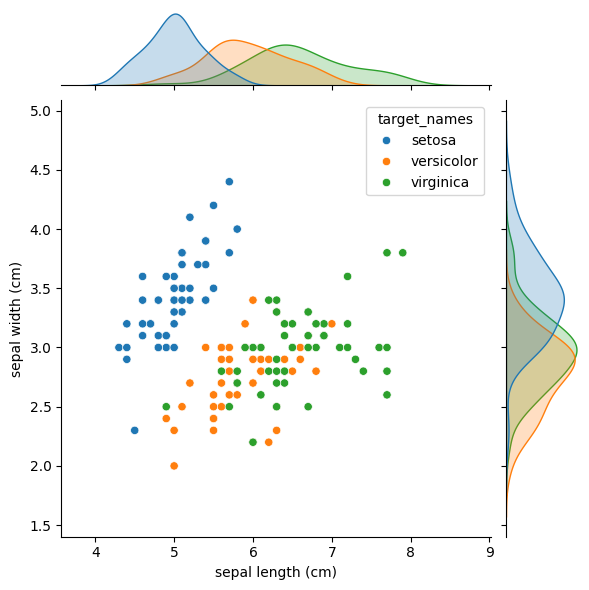

In [2]:
# prompt: iris_df joint plot을 seaborn으로 시각화

import seaborn as sns
import matplotlib.pyplot as plt

sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=iris_df, hue='target_names')
plt.show()

In [5]:
iris_df.drop('target', axis=1, inplace=True)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


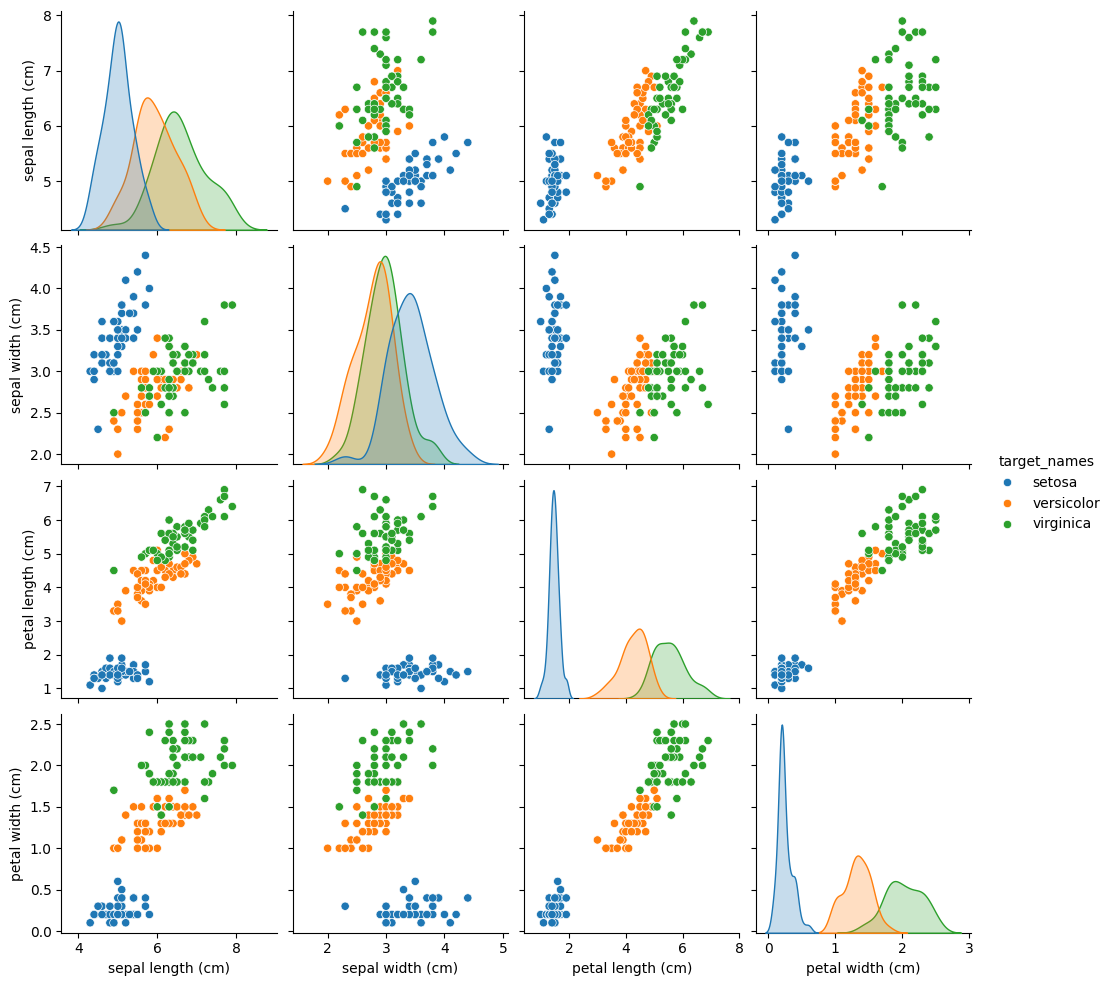

In [6]:
sns.pairplot(iris_df, hue="target_names")

In [7]:
# prompt: setosa와 viginica 만 남기고 데이터를 지워줘

iris_df = iris_df[iris_df['target_names'].isin(['setosa', 'virginica'])]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


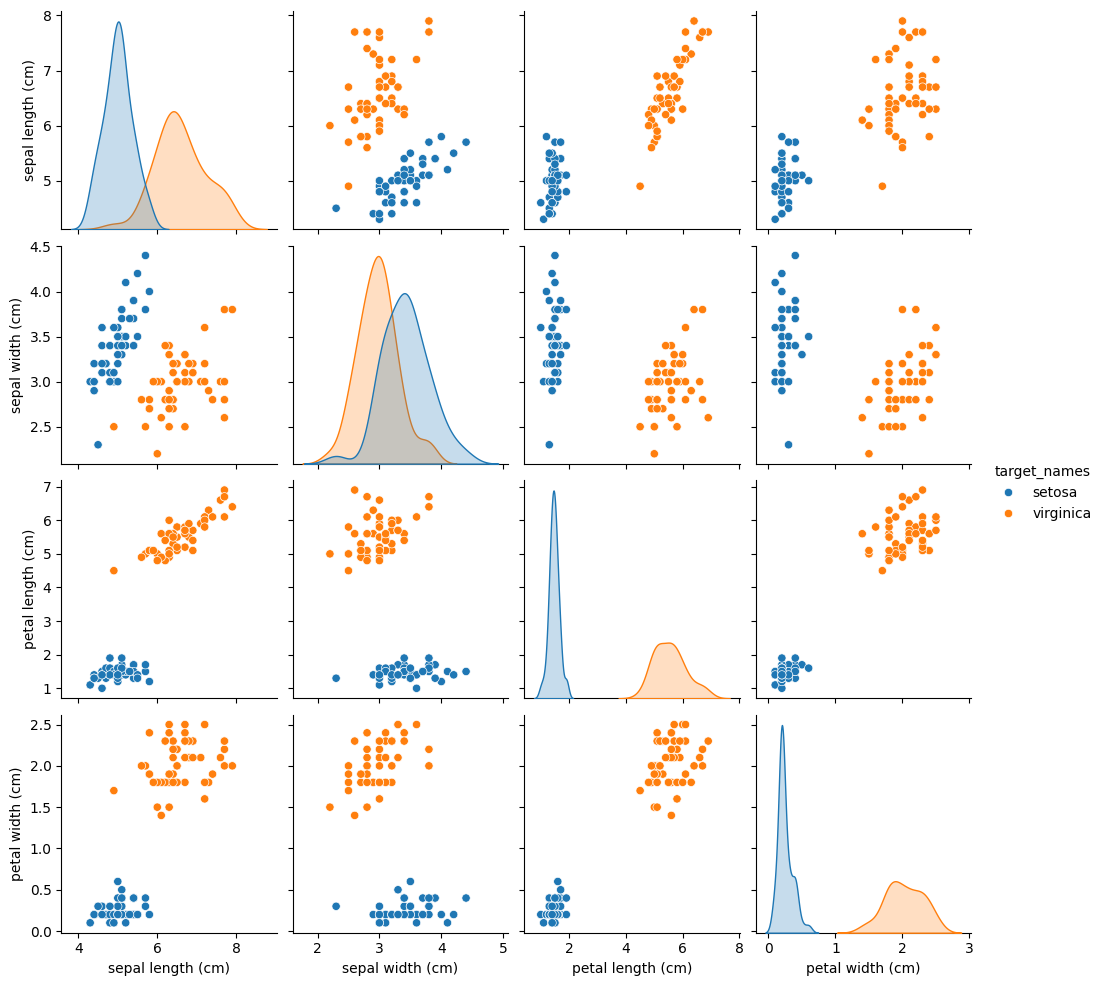

In [8]:
sns.pairplot(iris_df, hue="target_names")

<ipython-input-9-e80c3489523c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df['predicted_target'] = 'unknown'


   petal length (cm) target_names predicted_target
0                1.4       setosa           setosa
1                1.4       setosa           setosa
2                1.3       setosa           setosa
3                1.5       setosa           setosa
4                1.4       setosa           setosa


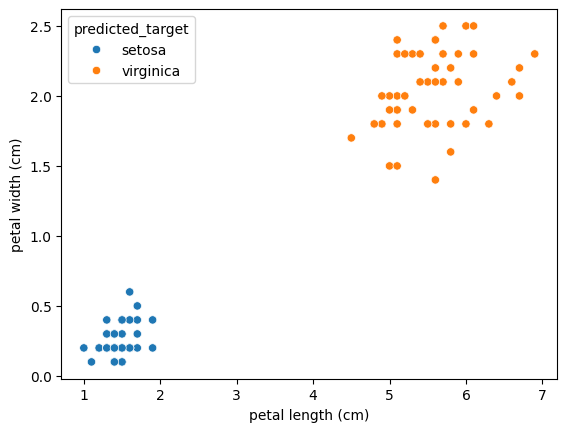

In [9]:
# prompt: petal length (cm) 의 값을 기준으로 target을 분류해줘

# petal length (cm) 기준으로 target 분류
petal_length_threshold = 2.5  # 예시 임계값, 필요에 따라 조정
iris_df['predicted_target'] = 'unknown'
iris_df.loc[iris_df['petal length (cm)'] < petal_length_threshold, 'predicted_target'] = 'setosa'
iris_df.loc[iris_df['petal length (cm)'] >= petal_length_threshold, 'predicted_target'] = 'virginica'


# 결과 확인
print(iris_df[['petal length (cm)', 'target_names', 'predicted_target']].head())

# 분류 결과 시각화 (선택 사항)
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='predicted_target', data=iris_df)
plt.show()

In [11]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names,predicted_target
0,5.1,3.5,1.4,0.2,setosa,setosa
1,4.9,3.0,1.4,0.2,setosa,setosa
2,4.7,3.2,1.3,0.2,setosa,setosa
3,4.6,3.1,1.5,0.2,setosa,setosa
4,5.0,3.6,1.4,0.2,setosa,setosa


In [13]:
# prompt: target_names	predicted_target 의 정확도를 코드로

# 정확도 계산
correct_predictions = (iris_df['target_names'] == iris_df['predicted_target']).sum()
total_predictions = len(iris_df)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [14]:
# prompt: petal length (cm),	petal width (cm), predicted_target 컴럼은 제외하라

iris_df.drop(['petal length (cm)', 'petal width (cm)', 'predicted_target'], axis=1, inplace=True)
iris_df.head()

<ipython-input-14-f7ab14d7f63c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iris_df.drop(['petal length (cm)', 'petal width (cm)', 'predicted_target'], axis=1, inplace=True)


,sepal length (cm),sepal width (cm),target_names
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa


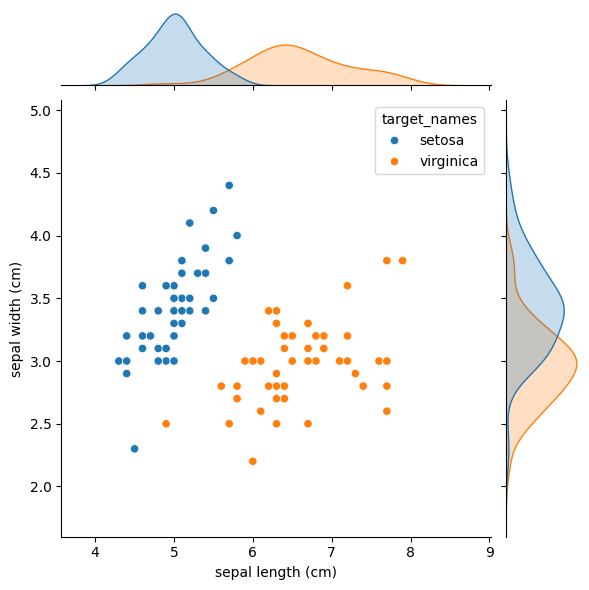

In [15]:

sns.jointplot(x='sepal length (cm)', y='sepal width (cm)', data=iris_df, hue='target_names')
plt.show()

## 1. sepal length (cm) 7이면 target은?
## 2. sepal length (cm)	sepal width (cm) 가 각각 6과 3.2이면 target은?

In [18]:
# prompt: iris_df 바탕으로 knn을 사용하여 예측해다오

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 특성(features)과 타겟(target) 분리
X = iris_df.drop('target_names', axis=1)
y = iris_df['target_names']

# 데이터 분할 (학습 데이터와 테스트 데이터)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 생성 및 학습 (k=3으로 설정)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = knn.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


In [20]:
# 새로운 데이터 예측
# 1. sepal length (cm) 7
# new_data_1 should only include the features used during training: 'sepal length (cm)', 'sepal width (cm)'
new_data_1 = pd.DataFrame({'sepal length (cm)': [7], 'sepal width (cm)': [3]})
prediction_1 = knn.predict(new_data_1)
print(f"Prediction for sepal length 7: {prediction_1[0]}")

# 2. sepal length (cm) 6, sepal width (cm) 3.2
# new_data_2 should only include the features used during training: 'sepal length (cm)', 'sepal width (cm)'
new_data_2 = pd.DataFrame({'sepal length (cm)': [6], 'sepal width (cm)': [3.2]})
prediction_2 = knn.predict(new_data_2)
print(f"Prediction for sepal length 6 and sepal width 3.2: {prediction_2[0]}")

Prediction for sepal length 7: virginica
Prediction for sepal length 6 and sepal width 3.2: virginica


In [25]:
# prompt: 2개 새로운 데이터로 예측 확률을 구해줘

# 새로운 데이터 예측
# 1. sepal length (cm) 7, sepal width (cm) 3.5
new_data_3 = pd.DataFrame({'sepal length (cm)': [5.3], 'sepal width (cm)': [3.]})
prediction_3 = knn.predict_proba(new_data_3)
print(f"Prediction probabilities for sepal length 7 and sepal width 3.5:\n{prediction_3}")

# 2. sepal length (cm) 6.5, sepal width (cm) 3.0
new_data_4 = pd.DataFrame({'sepal length (cm)': [6.5], 'sepal width (cm)': [3.0]})
prediction_4 = knn.predict_proba(new_data_4)
print(f"Prediction probabilities for sepal length 6.5 and sepal width 3.0:\n{prediction_4}")

Prediction probabilities for sepal length 7 and sepal width 3.5:
[[0.66666667 0.33333333]]
Prediction probabilities for sepal length 6.5 and sepal width 3.0:
[[0. 1.]]


In [27]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'target_names'], dtype='object')

In [32]:
knn.predict_proba(iris_df[['sepal length (cm)', 'sepal width (cm)']])[:10]

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [33]:
knn.predict_proba(iris_df[['sepal length (cm)', 'sepal width (cm)']])[:, 1][:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [34]:
knn.predict_proba(iris_df[['sepal length (cm)', 'sepal width (cm)']])[:, 0][:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [36]:
iris_df.describe()

,sepal length (cm),sepal width (cm)
count,100.000000,100.000000
mean,5.797000,3.201000
std,0.945319,0.417906
min,4.300000,2.200000
25%,5.000000,3.000000
50%,5.700000,3.200000
75%,6.500000,3.425000
max,7.900000,4.400000


In [57]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
X.shape

(1000, 2)

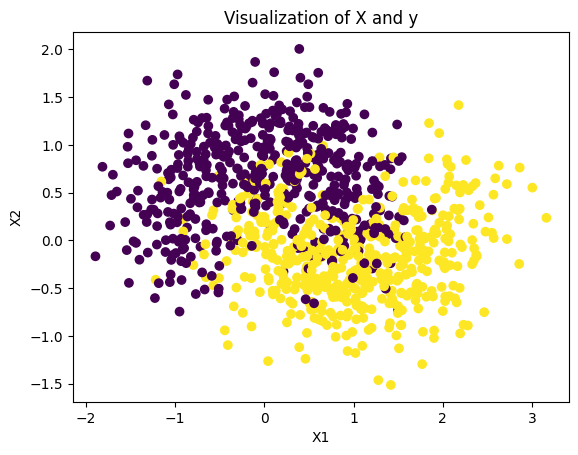

In [58]:
# prompt: X, y  를 시각화해줘

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Visualization of X and y")
plt.show()

In [59]:
# prompt: X, y를 바탕으로 knn으로 예측해줘

# Assuming X and y are already defined as in the provided code.
# If not, make sure to define X and y appropriately before running this.

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.86


In [61]:

# Make probability of predictions
y_prob = knn.predict_proba(X_test)
y_prob[:10]

array([[0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.66666667, 0.33333333],
       [0.        , 1.        ],
       [0.66666667, 0.33333333]])

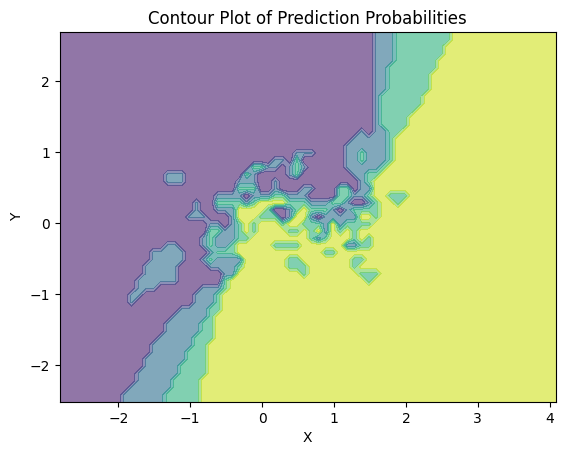

In [67]:
# prompt: X_test, y_prob 를 가지고 X, Y, Z 로 등고선으로 그려다오

import numpy as np
import matplotlib.pyplot as plt

# Assuming X_test and y_prob are already defined from the previous code.
# If not, make sure to define them before running this.

# Create a meshgrid for the contour plot
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict probabilities for the meshgrid points
Z = knn.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # Probability of class 1
Z = Z.reshape(xx.shape)

# Plot the contour
plt.contourf(xx, yy, Z, alpha=0.6)
# plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')  # Plot the test data points
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Contour Plot of Prediction Probabilities")
plt.show()

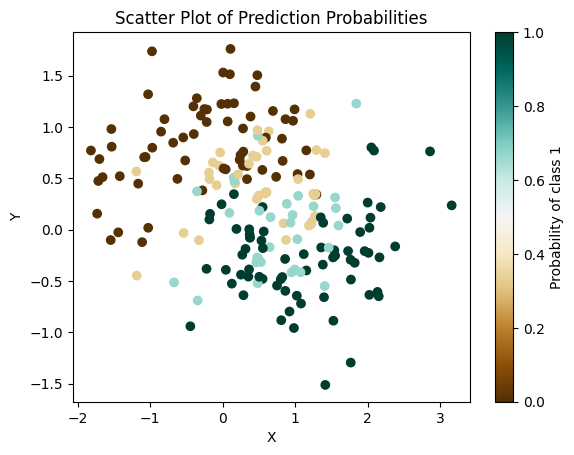

In [71]:
# prompt: meshgrid 를 그리지 말고 그냥 그려다오 단  예측확률을 z로 하고 z값을 등고선으로

# Assuming X_test and y_prob are already defined from the previous code.
# If not, make sure to define them before running this.

# Create a scatter plot with color-coded points based on the predicted probabilities
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_prob[:, 1], cmap='BrBG')  # Use y_prob[:, 1] for class 1 probability

# Add labels and title
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of Prediction Probabilities")

# Show the plot
plt.colorbar(label='Probability of class 1')
plt.show()

### MINST

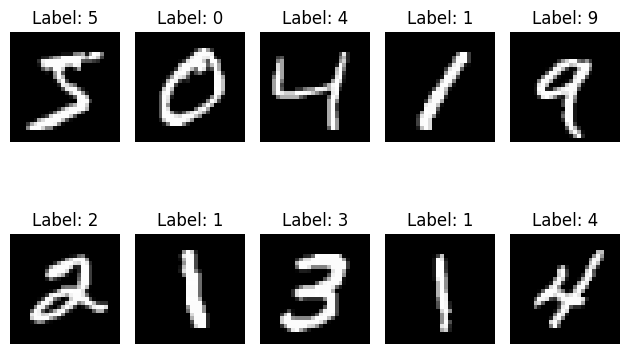

In [74]:
# prompt: minst 데이터를 가져오고 10개만 시각화

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# MNIST 데이터셋 로드
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 처음 10개 이미지 시각화
for i in range(10):
    plt.subplot(2, 5, i + 1)  # 2x5 그리드에 이미지 표시
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [76]:
X_train.shape

(60000, 28, 28)

In [78]:
y_train.shape

(60000,)

In [79]:
# prompt: X_train을 데이터프레임으로 만들어줘

X_train_df = pd.DataFrame(X_train)
X_train_df

ValueError: Must pass 2-d input. shape=(60000, 28, 28)

In [80]:

# X_train을 2차원으로 변환
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
# X_train.shape[0]은 이미지 개수(60000)를 유지하고,
# -1은 나머지 차원을 자동으로 계산하여 2차원으로 만들도록 합니다. (28x28 = 784)

# 데이터프레임 생성
X_train_df = pd.DataFrame(X_train_reshaped)
X_train_df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


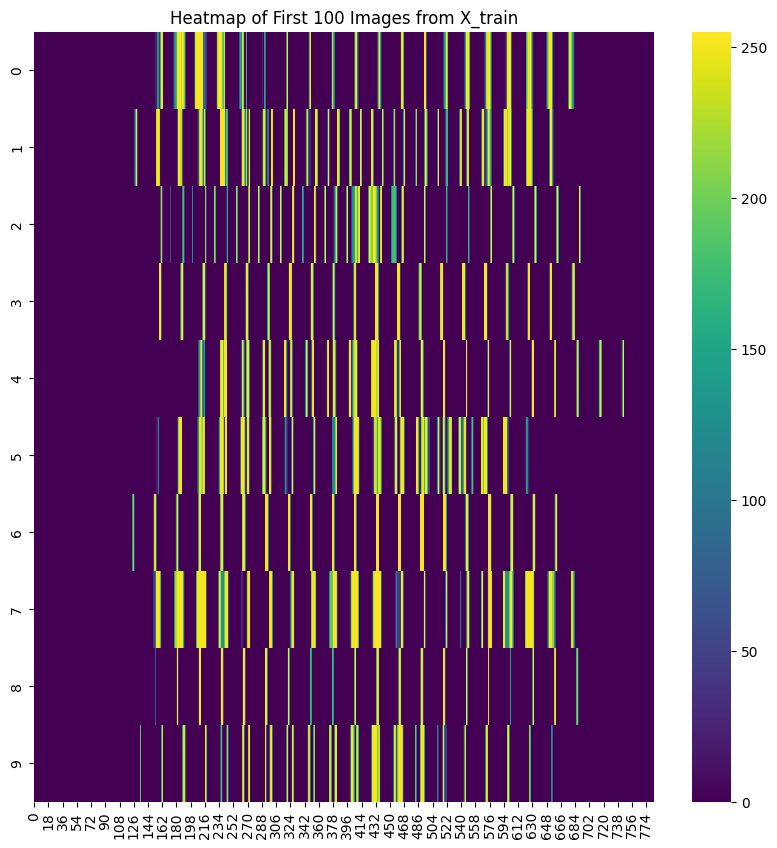

In [92]:
# prompt: X_train_df[:100]을 seaborn의 heatmap으로

plt.figure(figsize=(10, 10))
sns.heatmap(X_train_df[:10], cmap='viridis')
plt.title('Heatmap of First 100 Images from X_train')
plt.show()

### 1 번망 select

In [ ]:
y_train[:100][y_train[:100] == 1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=uint8)

In [101]:
Xrain_1 = X_train_df[:100][y_train[:100] == 1]
Xrain_1

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


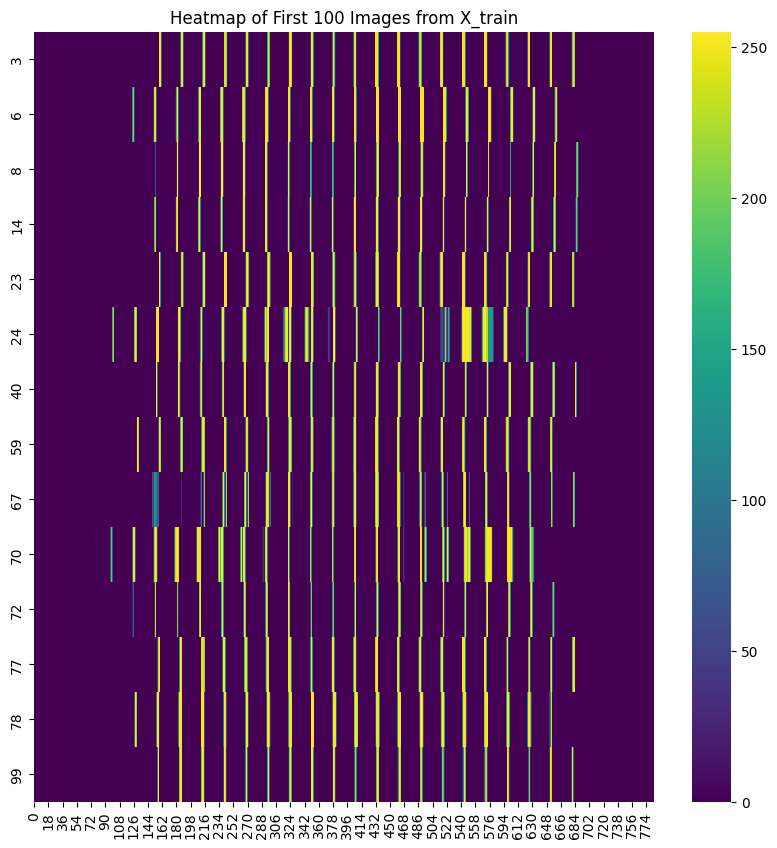

In [102]:
plt.figure(figsize=(10, 10))
sns.heatmap(Xrain_1, cmap='viridis')
plt.title('Heatmap of First 100 Images from X_train')
plt.show()

In [103]:
# prompt: Minst를 knn으로 예측해줘

# Reshape the data
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Reduce the dataset size for faster processing (optional)
n_samples = 1000  # Example: Use 1000 samples for training
X_train_subset = X_train_reshaped[:n_samples]
y_train_subset = y_train[:n_samples]
X_test_subset = X_test_reshaped[:n_samples] # Example: Use 1000 samples for testing
y_test_subset = y_test[:n_samples] # Example: Use 1000 samples for testing

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3) # You can adjust the number of neighbors
knn.fit(X_train_subset, y_train_subset)

# Make predictions
y_pred = knn.predict(X_test_subset)

# Evaluate the model
accuracy = accuracy_score(y_test_subset, y_pred)
print(f"Accuracy on MNIST test set: {accuracy}")

Accuracy on MNIST test set: 0.814


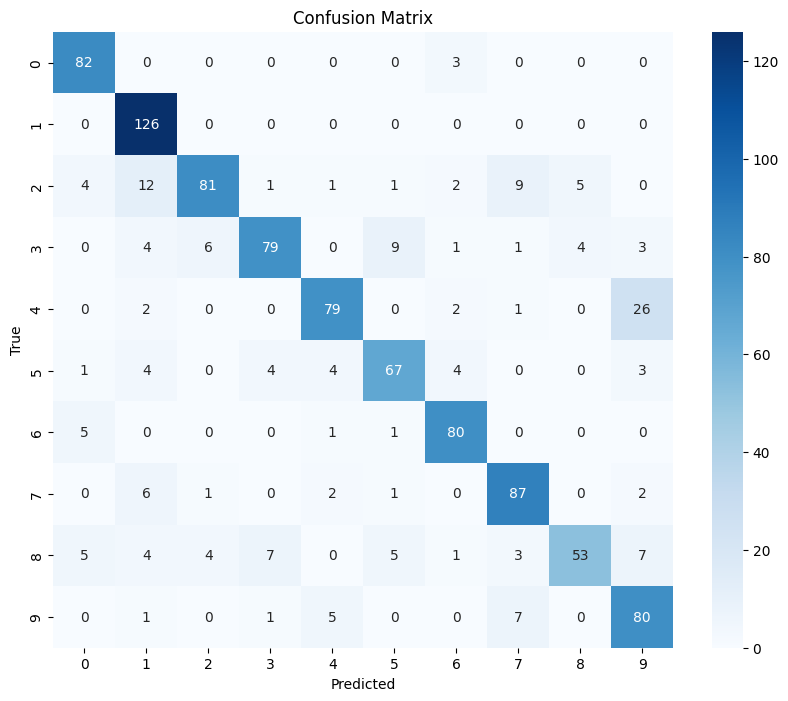

In [104]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from the previous code.
# If not, make sure to define them before running this.

# Compute the confusion matrix
cm = confusion_matrix(y_test_subset, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test_subset), yticklabels=np.unique(y_test_subset))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [105]:
# prompt: keras 로

from tensorflow import keras
from tensorflow.keras.layers import Dense

# Assuming X_train_reshaped, y_train, X_test_reshaped, and y_test are defined from the previous code.
# If not, make sure to define them before running this.

# Define the Keras model
model = keras.Sequential([
    Dense(128, activation='relu', input_shape=(784,)),  # Input layer with 784 features
    Dense(10, activation='softmax')  # Output layer with 10 classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32) # Adjust epochs and batch size as needed

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8121 - loss: 7.0569
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9116 - loss: 0.3533
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9328 - loss: 0.2602
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9369 - loss: 0.2423
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9411 - loss: 0.2182
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9260 - loss: 0.3111
Test loss: 0.2659221887588501
Test accuracy: 0.9337999820709229


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9472 - loss: 0.1996 - val_accuracy: 0.9402 - val_loss: 0.2346
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9521 - loss: 0.1818 - val_accuracy: 0.9504 - val_loss: 0.2088
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9579 - loss: 0.1667 - val_accuracy: 0.9441 - val_loss: 0.2626
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9556 - loss: 0.1736 - val_accuracy: 0.9517 - val_loss: 0.2142
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9576 - loss: 0.1646 - val_accuracy: 0.9445 - val_loss: 0.2661


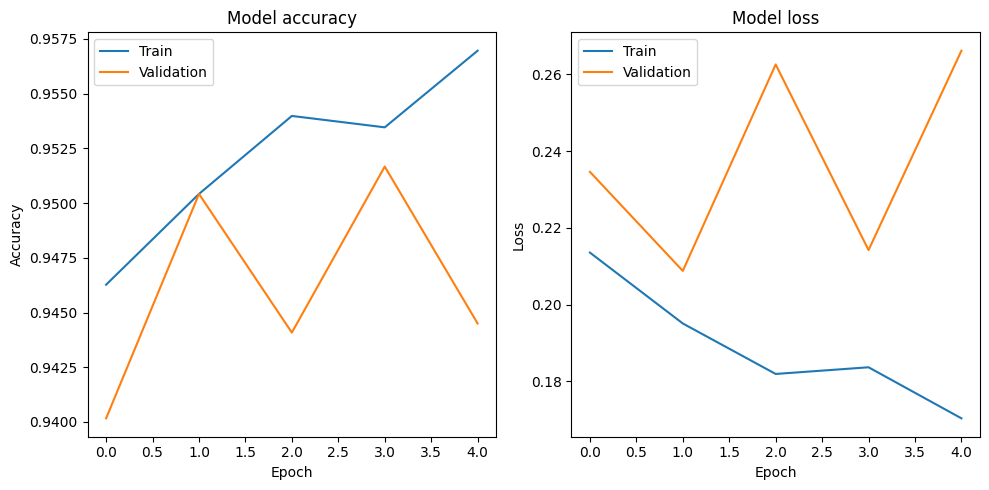

In [107]:
# prompt: 딥러닝 hist를 궇고 시각화

# Assuming model is defined and trained as in the previous code.
# If not, make sure to define and train the model before running this.

import matplotlib.pyplot as plt

# Train the model with validation_split or validation_data
# to collect training history data
model.fit(X_train_reshaped, y_train, epochs=5, batch_size=32, validation_split=0.2) # Added validation_split

# Get the training history
history = model.history.history

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history['accuracy']) # Now 'accuracy' should be present in history
plt.plot(history['val_accuracy']) # Plot validation accuracy as well
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history['loss'])  # Now 'loss' should be present in history
plt.plot(history['val_loss']) # Plot validation loss as well
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [108]:
# prompt: transformer를 사용하여 감성분석을 해줘

!pip install transformers

from transformers import pipeline

classifier = pipeline("sentiment-analysis")

# 예시 문장
text = "This is a great movie!"
result = classifier(text)
print(result)

text = "This is a terrible movie!"
result = classifier(text)
result

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998748302459717}]


[{'label': 'NEGATIVE', 'score': 0.9996786117553711}]

In [112]:
# prompt: nltk에서 alice.txt를 읽어줘

import nltk
nltk.download('punkt')
nltk.download('gutenberg')
from nltk.corpus import gutenberg

alice = gutenberg.raw('carroll-alice.txt')
print(alice[:1000]) #처음 1000자 출력

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...


[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy and stupid), whether the pleasure
of making a daisy-chain would be worth the trouble of getting up and
picking the daisies, when suddenly a White Rabbit with pink eyes ran
close by her.

There was nothing so VERY remarkable in that; nor did Alice think it so
VERY much out of the way to hear the Rabbit say to itself, 'Oh dear!
Oh dear! I shall be late!' (when she thought it over afterwards, it
occurred to her that she ought to have wondered at this, but at the time
it all seemed quite natural); but

[nltk_data]   Unzipping corpora/gutenberg.zip.


In [115]:
# prompt: alice 에서 마침표가 끝나는 것을 기준으로 100개를 뽑아서 데이터프레임으로

import pandas as pd
from nltk.corpus import gutenberg

alice = gutenberg.raw('carroll-alice.txt')
sentences = alice.split('.')
alice_df = pd.DataFrame({'sentences': sentences[:100]})
alice_df

,sentences
0,[Alice's Adventures in Wonderland by Lewis Car...
1,Down the Rabbit-Hole\n\nAlice was beginning t...
2,\n\nThere was nothing so VERY remarkable in th...
3,\n\nIn another moment down went Alice after it...
4,\n\nThe rabbit-hole went straight on like a tu...
...,...
95,"Alice kept her eyes anxiously fixed on it, fo..."
96,\n\n'Ahem!' said the Mouse with an important a...
97,"Silence all round, if you please! ""William\nt..."
98,"Edwin and Morcar, the earls of\nMercia and No..."


In [116]:
# prompt: alice_df를 sentiment 분석해서  그 결과와 확률을 각각 컬럼으로 만뜰어줘

# Install transformers if not already installed
# !pip install transformers

from transformers import pipeline
import pandas as pd

# Assuming alice_df is defined as in your provided code.
# If not, define it first.

classifier = pipeline("sentiment-analysis")

# Function to perform sentiment analysis on a text and extract results
def analyze_sentiment(text):
    try:
        result = classifier(text)[0]  # Get the first element of the result list
        return result['label'], result['score']
    except Exception as e:
        print(f"Error analyzing sentiment for text: {text}, Error: {e}")
        return "Error", 0  # Return "Error" and 0 if an error occurs


# Apply sentiment analysis to the 'sentences' column
alice_df[['sentiment', 'probability']] = alice_df['sentences'].apply(lambda x: pd.Series(analyze_sentiment(x)))
alice_df

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


,sentences,sentiment,probability
0,[Alice's Adventures in Wonderland by Lewis Car...,POSITIVE,0.993258
1,Down the Rabbit-Hole\n\nAlice was beginning t...,NEGATIVE,0.999170
2,\n\nThere was nothing so VERY remarkable in th...,NEGATIVE,0.556998
3,\n\nIn another moment down went Alice after it...,NEGATIVE,0.964526
4,\n\nThe rabbit-hole went straight on like a tu...,NEGATIVE,0.992121
...,...,...,...
95,"Alice kept her eyes anxiously fixed on it, fo...",NEGATIVE,0.988968
96,\n\n'Ahem!' said the Mouse with an important a...,NEGATIVE,0.982267
97,"Silence all round, if you please! ""William\nt...",NEGATIVE,0.978007
98,"Edwin and Morcar, the earls of\nMercia and No...",NEGATIVE,0.819117


In [109]:
# prompt: 성경을 가져와서 창세기에 나오는 단어를 추출해줘

import requests
from bs4 import BeautifulSoup

!pip install beautifulsoup4

def extract_genesis_words():
    # 성경 웹사이트에서 창세기 텍스트 가져오기 (예시: 개역개정)
    url = "https://www.biblegateway.com/passage/?search=Genesis&version=KJV"  # 원하는 성경 버전과 URL로 변경
    response = requests.get(url)
    response.raise_for_status()  # 요청 오류 확인

    soup = BeautifulSoup(response.content, "html.parser")

    # 창세기 텍스트 추출 (웹사이트 구조에 따라 변경 필요)
    genesis_text = ""
    for verse in soup.find_all("span", class_="text"): # Replace with the actual class or tag of the verse elements on the target webpage.
        genesis_text += verse.get_text() + " "

    # 단어 추출 및 전처리
    words = genesis_text.lower().split()
    # 불필요한 문자 제거, 정규표현식 사용 가능
    import re
    cleaned_words = [re.sub(r'[^\w\s]', '', word) for word in words if word.strip()]

    # 중복 제거 후 반환
    return list(set(cleaned_words))


if __name__ == "__main__":
    genesis_words = extract_genesis_words()
genesis_words

['all',
 'study',
 'blessed',
 'in',
 'replenish',
 'years',
 'first',
 'had',
 'bearing',
 'of',
 'his',
 'over',
 'our',
 'gathered',
 'plus',
 'him',
 'cattle',
 'divide',
 'bible',
 'creepeth',
 'and',
 'so',
 'let',
 'face',
 'saw',
 'day',
 'whose',
 '20',
 'great',
 'explore',
 'morning',
 'fly',
 'tools',
 'for',
 'brought',
 'spirit',
 'to',
 'man',
 'a',
 'winged',
 'multiply',
 'said',
 'is',
 'two',
 'may',
 '25',
 'seasons',
 'wherein',
 'there',
 'subdue',
 'beginning',
 'form',
 'night',
 'living',
 'seas',
 'third',
 'shall',
 '11',
 'thing',
 'store',
 '23',
 '16',
 'i',
 'lesser',
 'fourth',
 'divided',
 'was',
 'that',
 '4',
 'firmament',
 'fruitful',
 'under',
 'place',
 'fowl',
 'were',
 'dry',
 'fruit',
 'good',
 'darkness',
 'them',
 '29',
 '15',
 '2',
 'hath',
 'light',
 'make',
 'moved',
 'creeping',
 'give',
 'moveth',
 'rule',
 'waters',
 'lights',
 'which',
 'grass',
 'earth',
 '5',
 'above',
 'signs',
 'fifth',
 'us',
 'have',
 'without',
 'he',
 'made',
 '

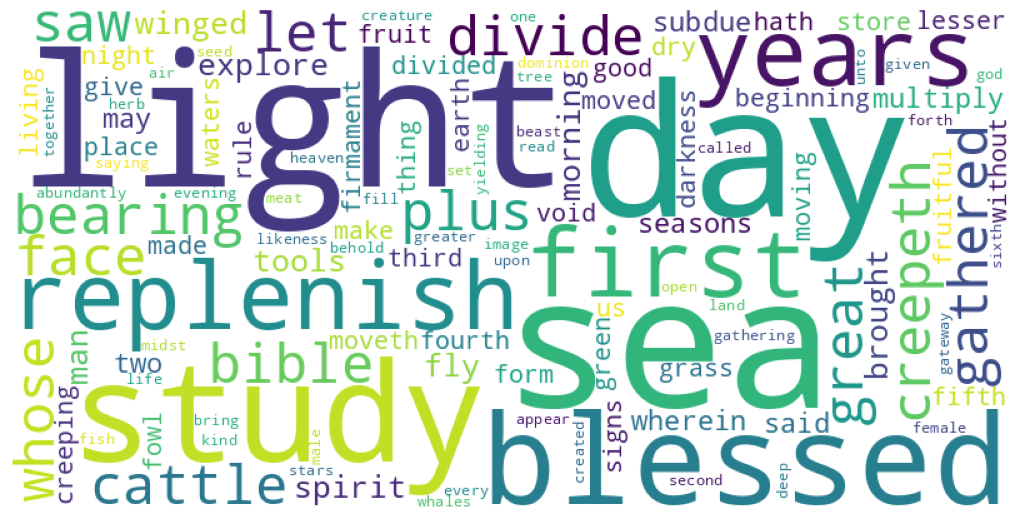

In [111]:
# prompt: 워드클라우드

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming genesis_words is defined from the previous code.  If not, uncomment the following:
# genesis_words = extract_genesis_words()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(genesis_words))

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### **Regression**

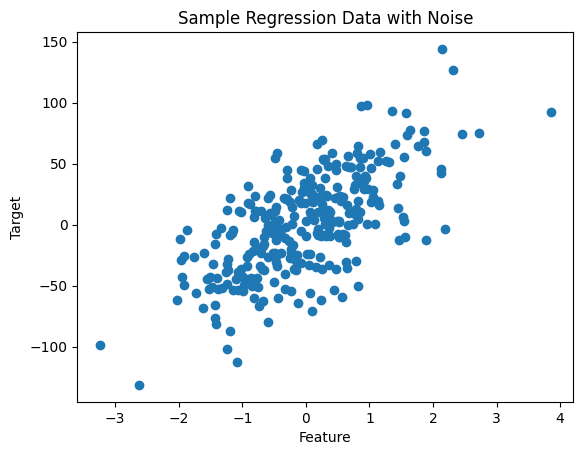

In [129]:
# prompt: make_regression()으로 노이즈를 넣고 가상데이터와 시각화

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate sample data with noise
X, y = make_regression(n_samples=300, n_features=1, noise=30, random_state=42)

# Visualize the data
plt.scatter(X, y)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Sample Regression Data with Noise")
plt.show()

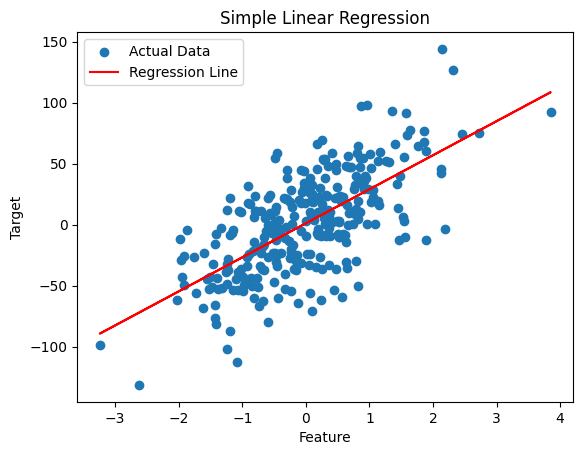

In [130]:
# prompt: 단순회귀분석을 하고 시각화

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 단순 선형 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 예측값 계산
y_pred = model.predict(X)

# 회귀선 시각화
plt.scatter(X, y, label='Actual Data')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

In [131]:
X.shape

(300, 1)

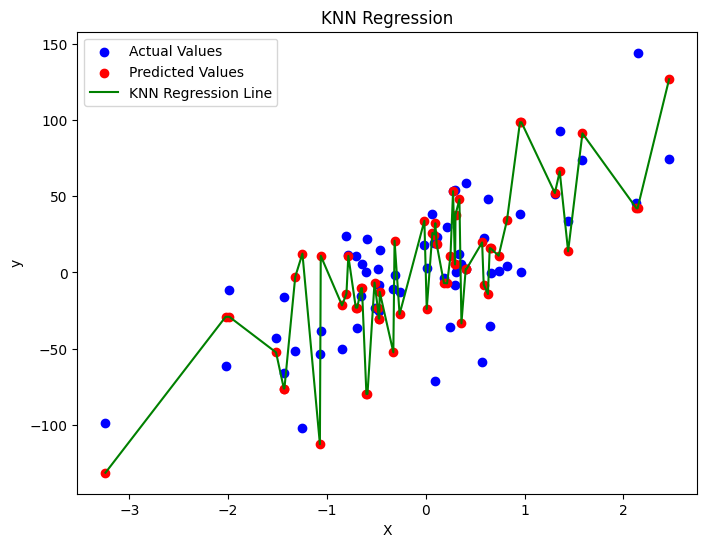

In [132]:
# prompt: X, y를 knn regressor로 예측하고 예측선과 같이 시각화

from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

# Assuming X and y are already defined from the provided code (make_moons data).
# If not, define X and y appropriately before running this.

# Split the data (you might want to use a different random_state or test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=1)  # You can adjust n_neighbors
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_regressor.predict(X_test)


# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual Values') # Actual data points
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted Values') # Predicted data points

# Sort the data for plotting the regression line (optional, for a smoother line)
sorted_indices = np.argsort(X_test[:, 0])
plt.plot(X_test[sorted_indices, 0], y_pred[sorted_indices], color='green', label='KNN Regression Line')  # KNN regression line


plt.xlabel('X')
plt.ylabel('y')
plt.title('KNN Regression')
plt.legend()
plt.show()

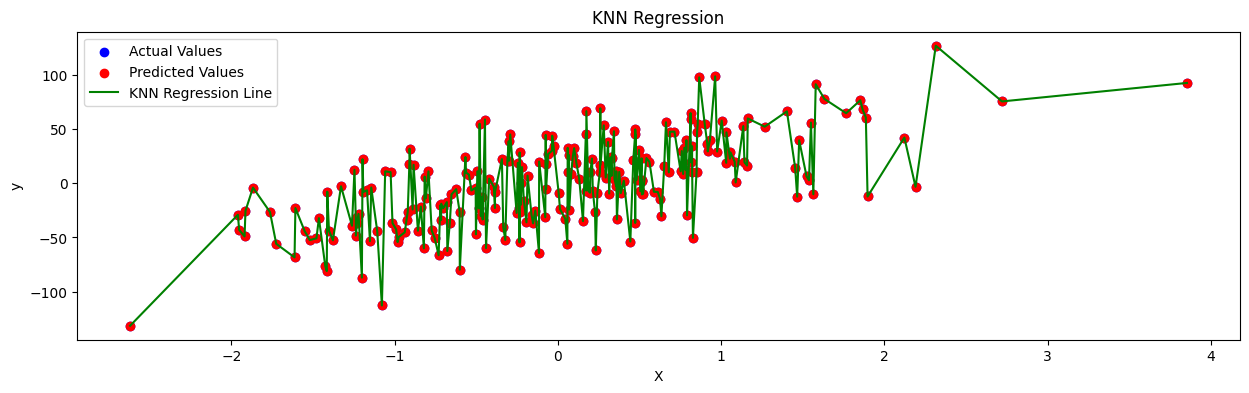

In [140]:

y_pred_X_train = knn_regressor.predict(X_train)

# Create the plot
plt.figure(figsize=(15, 4))
plt.scatter(X_train[:, 0], y_train, color='blue', label='Actual Values') # Actual data points
plt.scatter(X_train[:, 0], y_pred_X_train, color='red', label='Predicted Values') # Predicted data points

# Sort the data for plotting the regression line (optional, for a smoother line)
sorted_indices = np.argsort(X_train[:, 0])
plt.plot(X_train[sorted_indices, 0], y_pred_X_train[sorted_indices], color='green', label='KNN Regression Line')  # KNN regression line


plt.xlabel('X')
plt.ylabel('y')
plt.title('KNN Regression')
plt.legend()
plt.show()

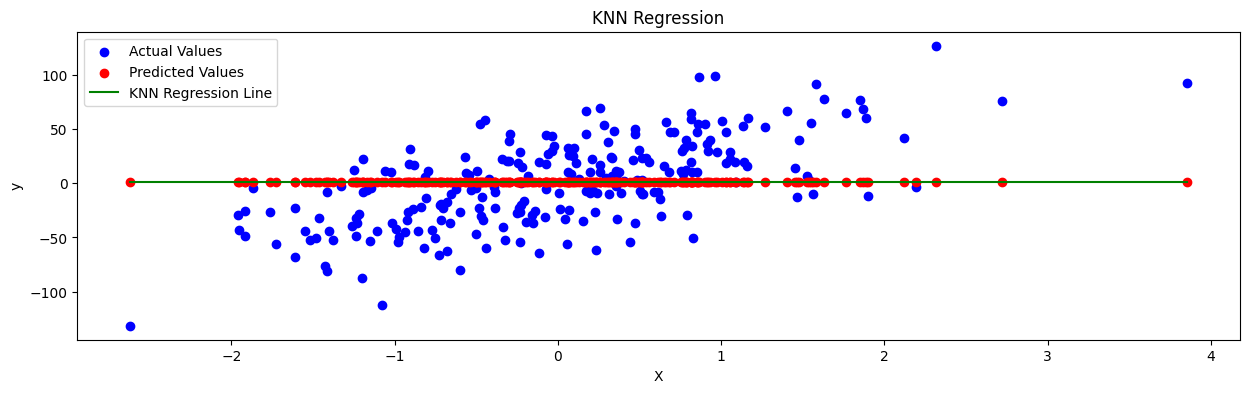

In [143]:
# Initialize and train the KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=len(X_train))  # You can adjust n_neighbors
knn_regressor.fit(X_train, y_train)

y_pred_X_train = knn_regressor.predict(X_train)

# Create the plot
plt.figure(figsize=(15, 4))
plt.scatter(X_train[:, 0], y_train, color='blue', label='Actual Values') # Actual data points
plt.scatter(X_train[:, 0], y_pred_X_train, color='red', label='Predicted Values') # Predicted data points

# Sort the data for plotting the regression line (optional, for a smoother line)
sorted_indices = np.argsort(X_train[:, 0])
plt.plot(X_train[sorted_indices, 0], y_pred_X_train[sorted_indices], color='green', label='KNN Regression Line')  # KNN regression line


plt.xlabel('X')
plt.ylabel('y')
plt.title('KNN Regression')
plt.legend()
plt.show()

### **Dimension Reduction**

X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


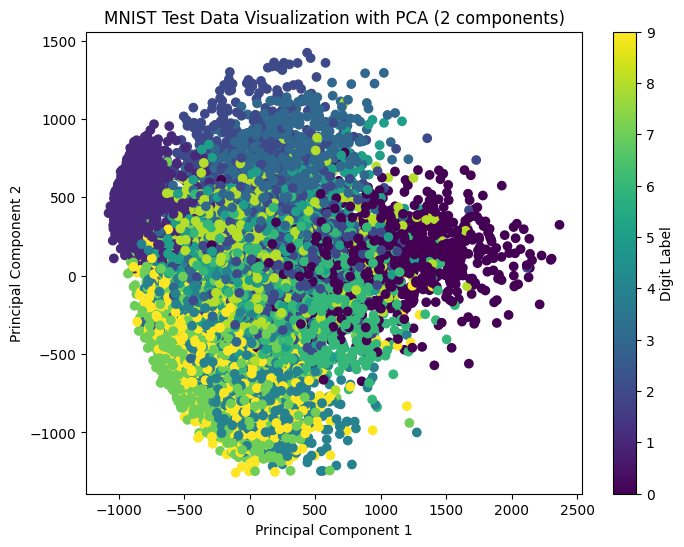

In [147]:
# prompt: 주성분분석 2개로 X_test을 시각화 해줘

from sklearn.decomposition import PCA

# 데이터 전처리 (28x28 이미지를 784차원 벡터로 변환)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# PCA를 사용하여 2개의 주성분으로 차원 축소
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_reshaped)

# 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("MNIST Test Data Visualization with PCA (2 components)")
plt.colorbar(label="Digit Label")
plt.show()

### **pycaret**

In [152]:
# prompt: pycaret으로 Minst classification

!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 43.7 MB/s eta 0:00:00
   ━━━━

In [1]:
# prompt: iris 데이터를 불러와 분류 예측해줘, pycaret으로

from pycaret.classification import *
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

In [3]:
# Setup PyCaret
clf = setup(data = iris_df,
            target = 'target')

,Description,Value
0,Session id,1503
1,Target,target
2,Target type,Multiclass
3,Original data shape,"(150, 5)"
4,Transformed data shape,"(150, 5)"
5,Transformed train set shape,"(105, 5)"
6,Transformed test set shape,"(45, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [4]:
models

<function pycaret.classification.functional.models(type: Optional[str] = None, internal: bool = False, raise_errors: bool = True) -> pandas.core.frame.DataFrame>

In [5]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [6]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.9818,0.0000,0.9818,0.9864,0.9818,0.9728,0.9750,0.0780
nb,Naive Bayes,0.9727,0.9976,0.9727,0.9786,0.9719,0.9586,0.9619,0.0540
lda,Linear Discriminant Analysis,0.9727,0.0000,0.9727,0.9791,0.9723,0.9589,0.9622,0.0350
rf,Random Forest Classifier,0.9636,0.9956,0.9636,0.9718,0.9628,0.9450,0.9494,0.3220
lr,Logistic Regression,0.9627,0.0000,0.9627,0.9716,0.9623,0.9440,0.9486,0.1020
knn,K Neighbors Classifier,0.9627,0.9938,0.9627,0.9711,0.9619,0.9435,0.9482,0.0890
et,Extra Trees Classifier,0.9627,0.9963,0.9627,0.9711,0.9619,0.9435,0.9482,0.1700
xgboost,Extreme Gradient Boosting,0.9436,0.9880,0.9436,0.9545,0.9428,0.9147,0.9204,0.0720
dt,Decision Tree Classifier,0.9427,0.9577,0.9427,0.9516,0.9423,0.9137,0.9183,0.0550
lightgbm,Light Gradient Boosting Machine,0.9345,0.9838,0.9345,0.9454,0.9337,0.9011,0.9071,0.0960


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
# Compare models
best_model = compare_models()